In [99]:
import numpy as np
import pandas as pd
from scipy.linalg import lstsq
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from typing import Callable

## Part 1

In [4]:
# Load the data
x0 = pd.read_csv('nonlinear_vectorfield_data_x0.txt', delim_whitespace=True, header=None).values
x1 = pd.read_csv('nonlinear_vectorfield_data_x1.txt', delim_whitespace=True, header=None).values

In [64]:
# Prepare the data
delta_X = x1 - x0

# 1. Estimate A
A, _, _, _ = np.linalg.lstsq(x0, delta_X, rcond=None)

# 2. Solve the ODE using Euler's method
dt = 0.01  # Given Δt
x1_approx = x0 + dt * np.dot(x0, A.T)

# 3. Calculate MSE
mse = np.mean((x1_approx - x1)**2)

print(f"The Mean Squared Error is: {mse}")
print("A:")
print(A)

The Mean Squared Error is: 0.025132102225035875
A:
[[-0.01001601  0.00086727]
 [-0.00025349 -0.04326714]]


## Part 2

In [6]:
# Define the basis function
def basis_function(x, c, epsilon):
    return np.exp(-1 * (np.linalg.norm(x - c) / epsilon) ** 2)

In [96]:
def rbf_approximation(epsilon, num_centers, x0, x1):
    # Perform RBF approximation
    centers = x0[np.random.choice(len(x0), num_centers)]

    # Compute the matrix of basis function values
    Phi = np.zeros((len(x0), num_centers))
    for i in range(len(x0)):
        for j in range(num_centers):
            Phi[i, j] = basis_function(x0[i], centers[j], epsilon)

    # Solve for the coefficients that minimize the difference between the data and the RBF approximation
    C, _, _, _ = lstsq(Phi, x1 - x0)

    # Define the trained function for applying one time step
    def apply_time_step(x):
        phi_x = np.zeros((1, num_centers))
        for i in range(num_centers):
            phi_x[0, i] = basis_function(x, centers[i], epsilon)
        delta_x = np.dot(phi_x, C)
        return x + delta_x

    return apply_time_step

In [84]:
from typing import List

def plot_mse(num_centers_list: List[int], train_errors: List[float], val_errors: List[float], epsilon: float) -> None:
    """
    Plots the mean squared error (MSE) values against the number of centers.

    Parameters:
        num_centers_list (List[int]): List of numbers of centers.
        train_errors (List[float]): List of training MSE values.
        val_errors (List[float]): List of validation MSE values.
        epsilon (float): Value of the epsilon parameter.

    Returns:
        None
    """
    plt.plot(num_centers_list, train_errors, label='Training Error')
    plt.plot(num_centers_list, val_errors, label='Validation Error')
    plt.xlabel('Number of Centers')
    plt.ylabel('Mean Squared Error')
    plt.title(f'MSE vs. Number of Centers, epsilon = {epsilon}')
    plt.legend()
    plt.show()


In [97]:
def calculate_mse(trained_func: callable, x0: np.ndarray, x1: np.ndarray) -> float:
    """
    Calculates the mean squared error (MSE) between the predicted values and the ground truth values.

    Parameters:
        trained_func (callable): The trained function for applying one time step.
        x0 (np.ndarray): Array of input values.
        x1 (np.ndarray): Array of ground truth values.

    Returns:
        float: The mean squared error (MSE) value.
    """
    x1_approx = np.array([trained_func(x) for x in x0])
    mse = np.mean(np.square(x1 - x1_approx))
    return mse


In [86]:
def plot_mse_vs_num_centers(x0: np.ndarray, x1: np.ndarray, epsilon: float):
    """
    Plots the mean squared error (MSE) values for different numbers of centers.

    Parameters:
        x0 (np.ndarray): Array of input values.
        x1 (np.ndarray): Array of ground truth values.
        epsilon (float): Value of the epsilon hyperparameter for radial basis functions.

    Returns:
        None
    """
    # Split the data into training and validation sets
    x0_train, x0_val, x1_train, x1_val = train_test_split(x0, x1, test_size=0.25, random_state=42)

    # Initialize lists to store MSE values
    train_errors = []
    val_errors = []
    num_centers_list = np.arange(100, 1100, 100)

    # Loop over different numbers of centers
    for num_centers in num_centers_list:
        print(f"\tnum_centers = {num_centers}")
        # Randomly select indices for centers
        center_indices = np.random.choice(len(x0_train), num_centers, replace=False)
        
        # Generate the rbf function based on subset of the training set
        trained_func = rbf_approximation(epsilon, num_centers, x0_train[center_indices], x1_train[center_indices])

        # Calculate the MSE values for training set
        train_mse = calculate_mse(trained_func, x0_train, x1_train)
        train_errors.append(train_mse)

        # Calculate the MSE values for validation set
        val_mse = calculate_mse(trained_func, x0_val, x1_val)
        val_errors.append(val_mse)

    # Plot the MSE values
    plot_mse(num_centers_list, train_errors, val_errors, epsilon)



	num_centers = 100
	num_centers = 200
	num_centers = 300
	num_centers = 400
	num_centers = 500
	num_centers = 600
	num_centers = 700
	num_centers = 800
	num_centers = 900
	num_centers = 1000


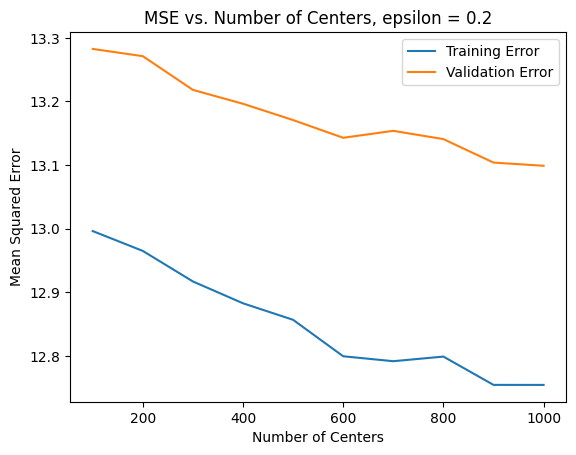

In [87]:
plot_mse_vs_num_centers(x0, x1, 0.2)

	num_centers = 100
	num_centers = 200
	num_centers = 300
	num_centers = 400
	num_centers = 500
	num_centers = 600
	num_centers = 700
	num_centers = 800
	num_centers = 900
	num_centers = 1000


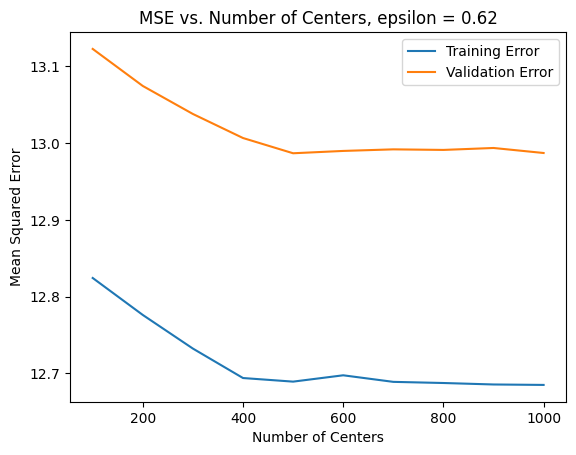

In [ ]:
plot_mse_vs_num_centers(x0, x1, 0.62)

In [ ]:
plot_mse_vs_num_centers(x0, x1, 0.8)

## Part 3

In [100]:
def plot_vectorfield_state(x0: np.ndarray, title: str = ''):
    """
    Plots the state of the vector field.

    Parameters:
        x0 (np.ndarray): Array of points representing the state of the vector field.
        title (str): Title for the plot.

    Returns:
        None
    """
    plt.scatter(x0[:, 0], x0[:, 1], s=10, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.xlim(-4.6, 4.6)
    plt.ylim(-4.6, 4.6)
    plt.show()


def plot_time_step(start_distribution: np.ndarray, num_time_steps: int, trained_func: Callable[[np.ndarray], np.ndarray], epsilon: float):
    """
    Plots the evolution of the vector field over multiple time steps.

    Parameters:
        start_distribution (np.ndarray): Array of points representing the initial distribution of the vector field.
        num_time_steps (int): Number of time steps to simulate.
        trained_func (Callable[[np.ndarray], np.ndarray]): Function that applies one time step of the trained vector field.
        epsilon (float): Value of the epsilon hyperparameter for the trained vector field.

    Returns:
        None
    """
    x_current = start_distribution
    plot_vectorfield_state(x_current, f"time_step 0, epsilon = {epsilon}")

    for i in range(1, num_time_steps + 1):
        x_next = np.zeros_like(x_current)
        for j in range(len(x_current)):
            x_next[j] = trained_func(x_current[j])
            
        plot_vectorfield_state(x_next, f"time_step {i}, epsilon = {epsilon}")
        x_current = x_next


In [101]:
# Based on the diffusion maps exercise: Set ϵ to 5% of the diameter of the dataset

# Calculate the maximum distance
D = np.linalg.norm(x0[:, np.newaxis] - x0, axis=2)
max_distance = np.max(D)

# Calculate epsilon_diameter as 5% of the maximum distance
epsilon_diameter = 0.05 * max_distance

print(f"Epsilon Diameter: {epsilon_diameter}")

Epsilon Diameter: 0.6207036470222818


In [90]:
def run_simulation(epsilon: float, num_centers: int, num_time_steps: int):
    """
    Runs the simulation by training the RBF approximation and plotting the time steps.

    Args:
        epsilon (float): The bandwidth parameter for the RBF approximation.
        num_centers (int): The number of centers used in the RBF approximation.
        num_time_steps (int): The number of time steps to simulate.

    Returns:
        None
    """
    print("Training...")
    trained_func = rbf_approximation(epsilon, num_centers, x0, x1)
    print("Done.")
    
    print("Plotting ...")
    plot_time_step(x0, num_time_steps, trained_func, epsilon)


Training...
Done.
Plotting ...


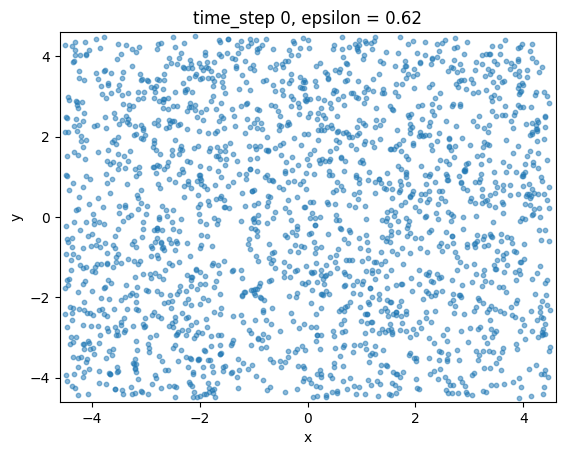

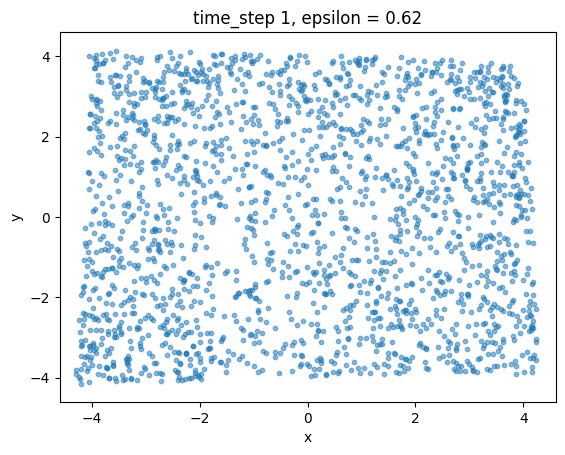

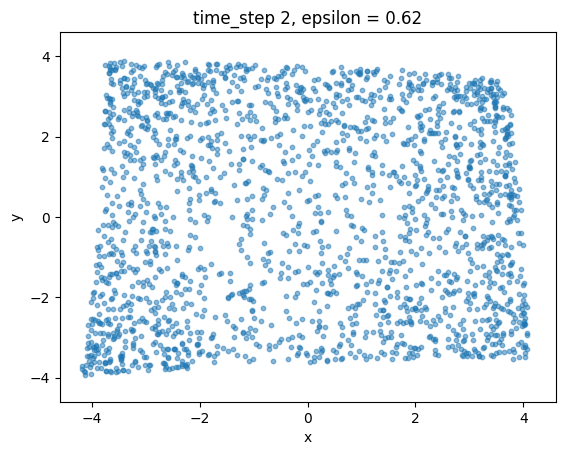

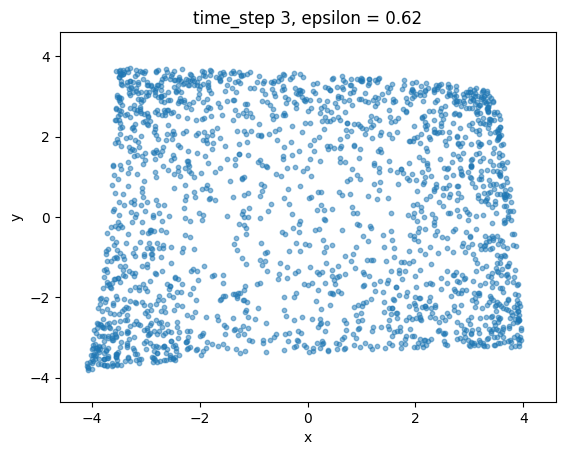

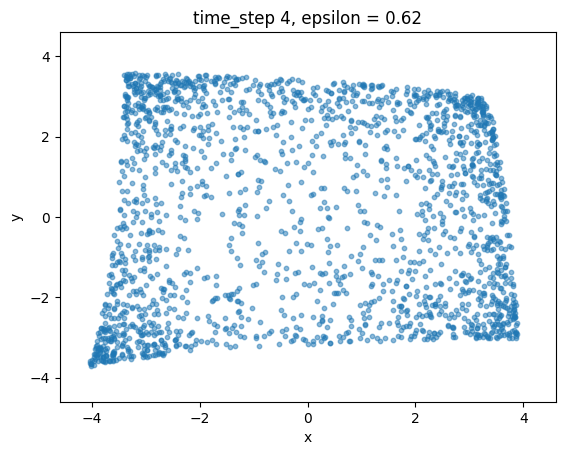

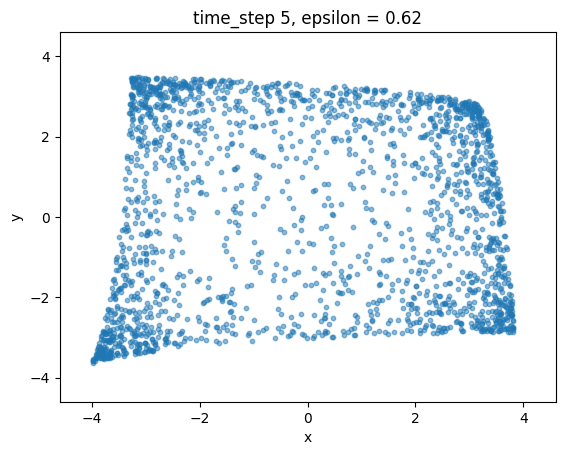

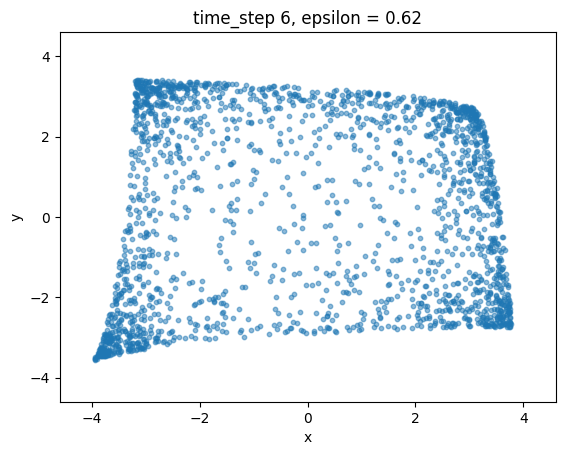

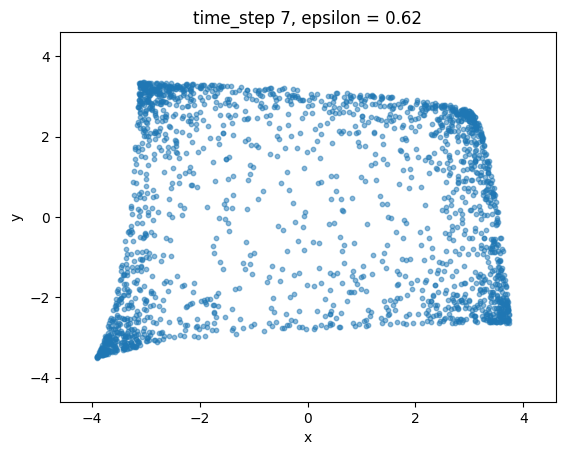

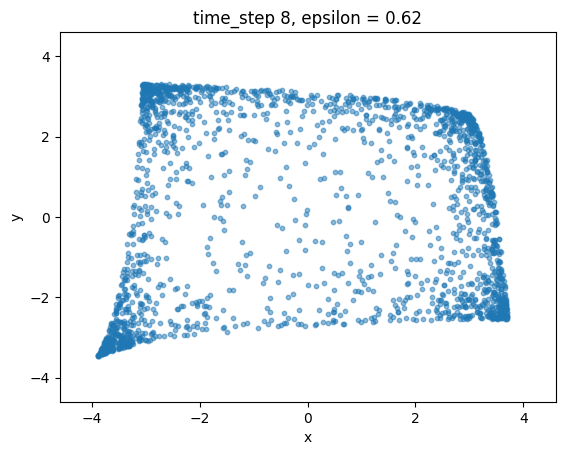

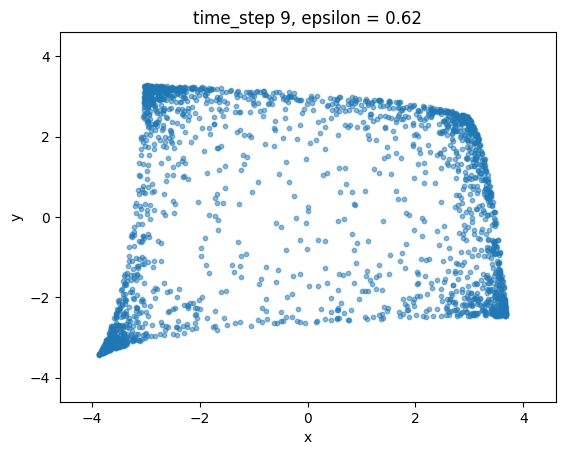

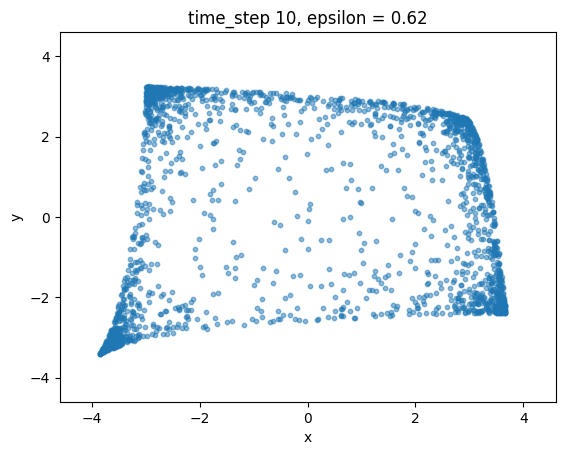

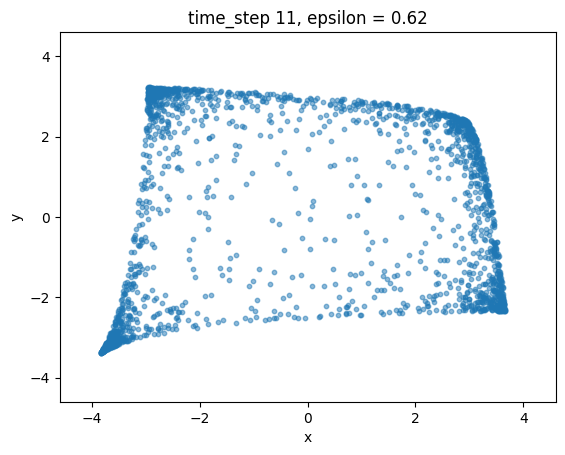

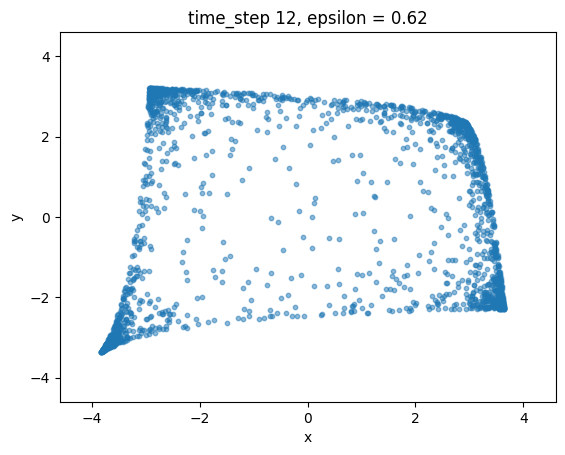

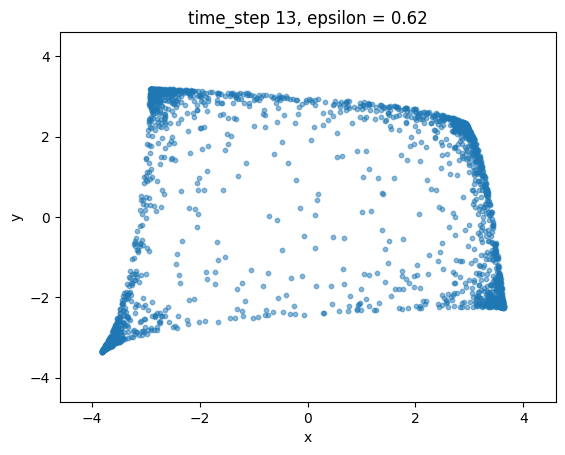

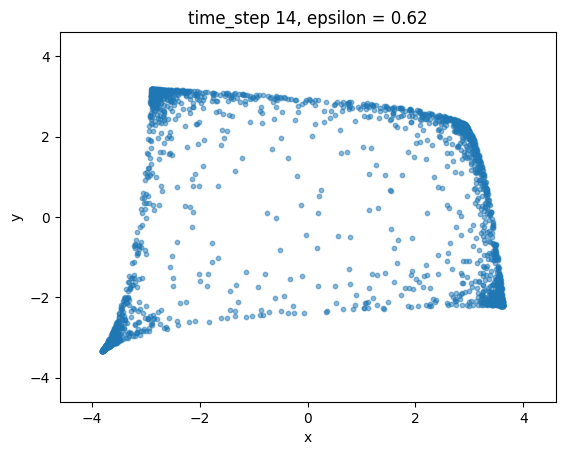

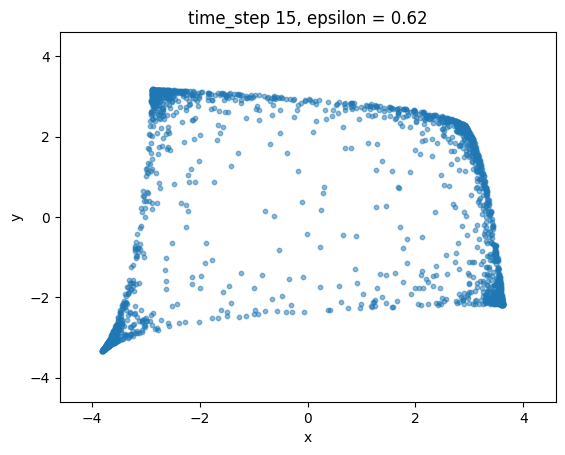

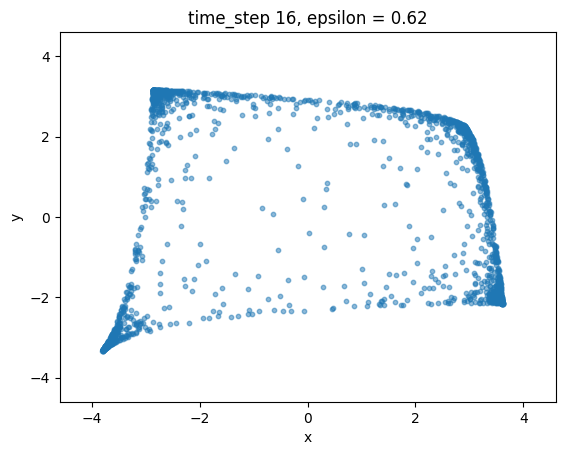

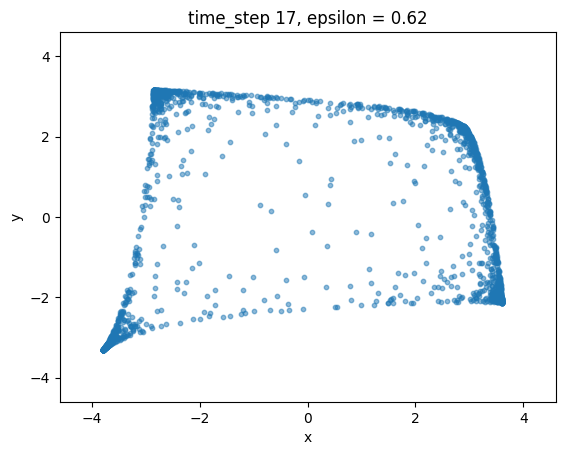

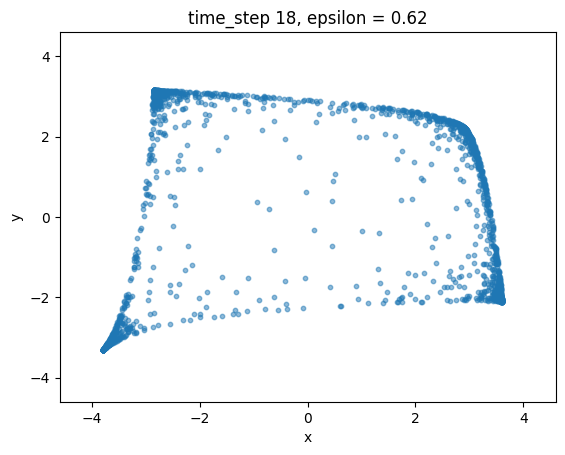

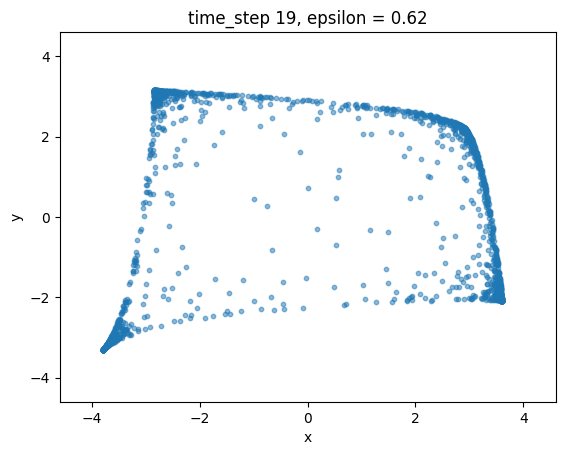

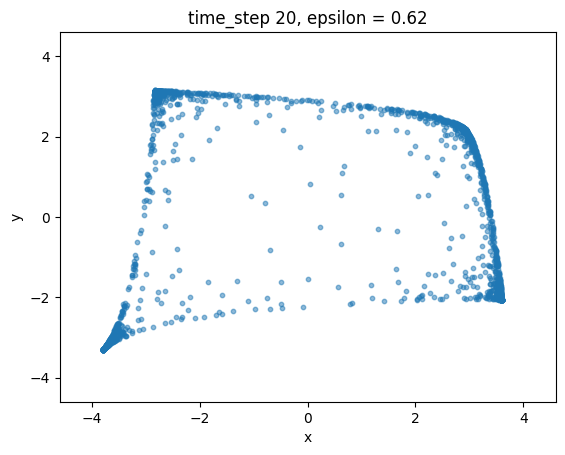

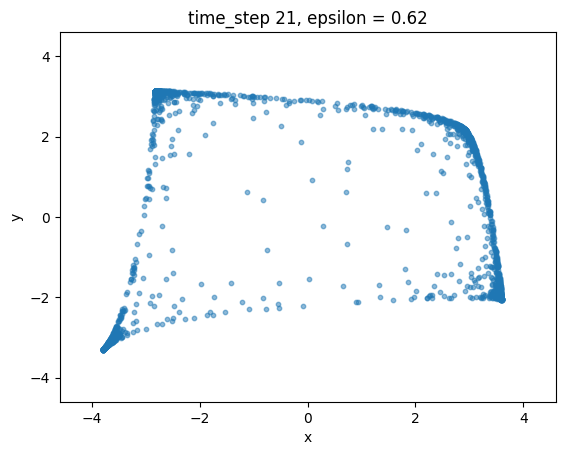

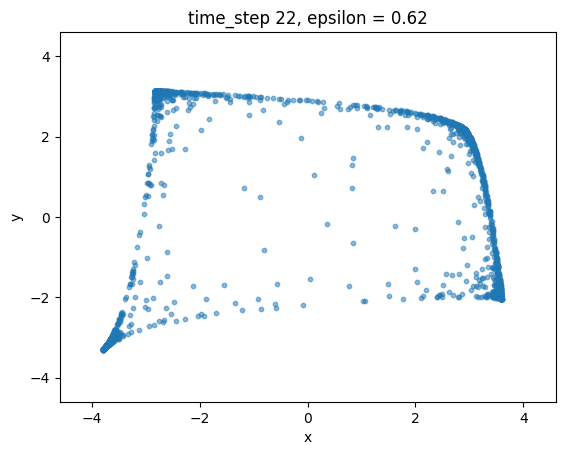

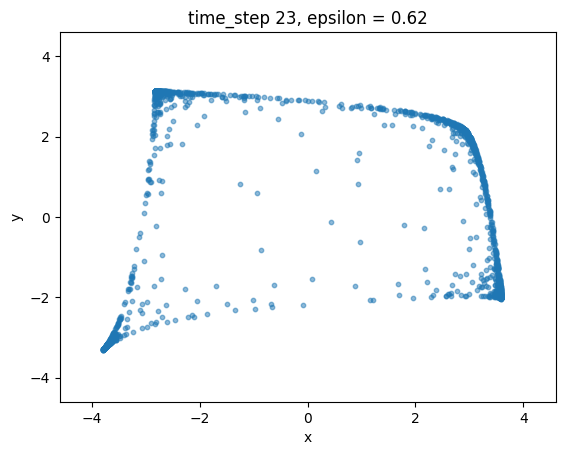

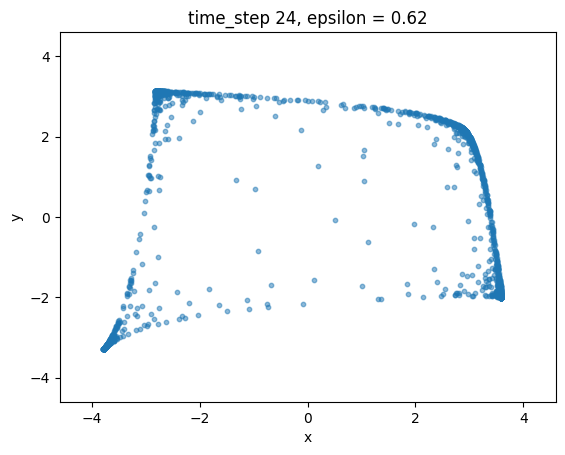

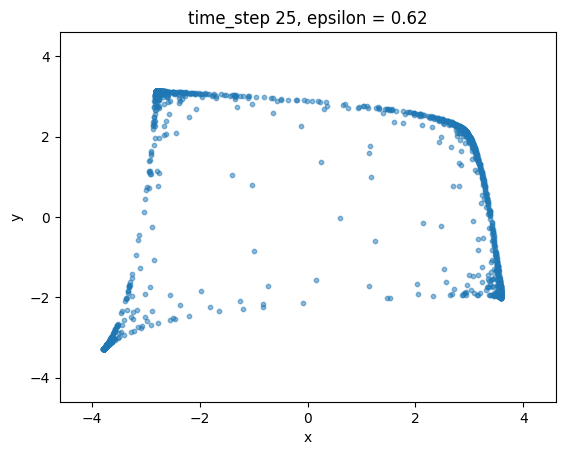

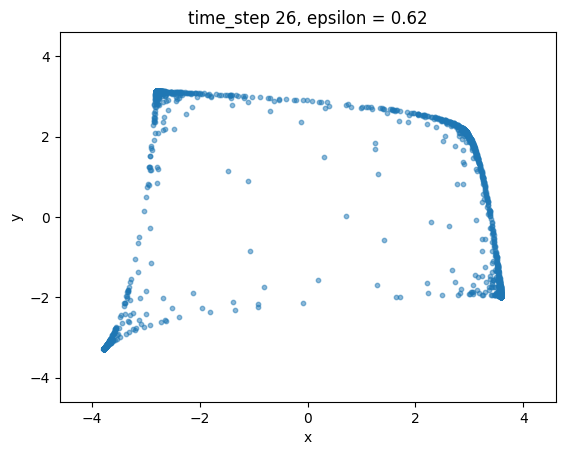

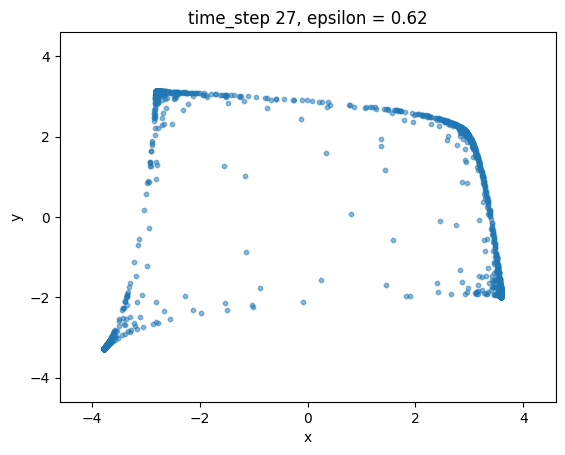

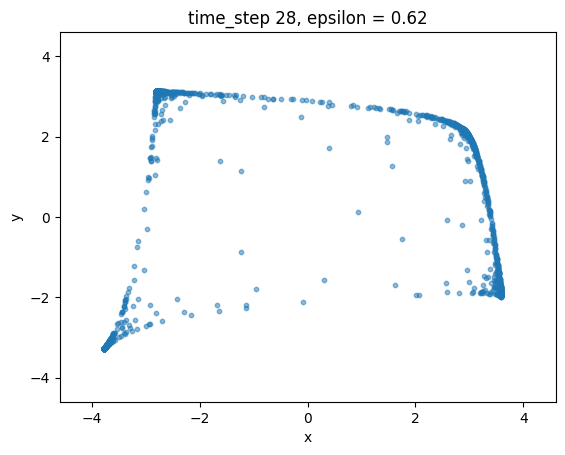

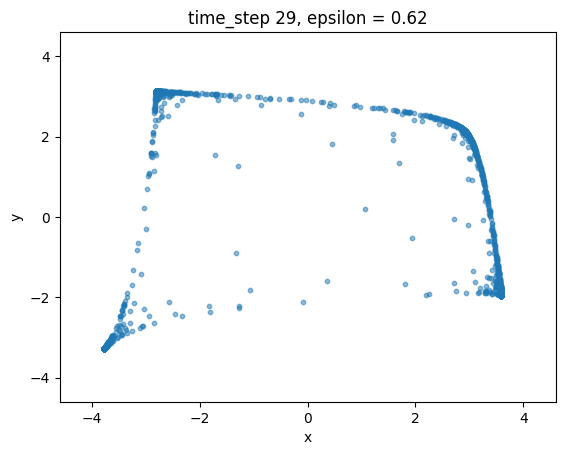

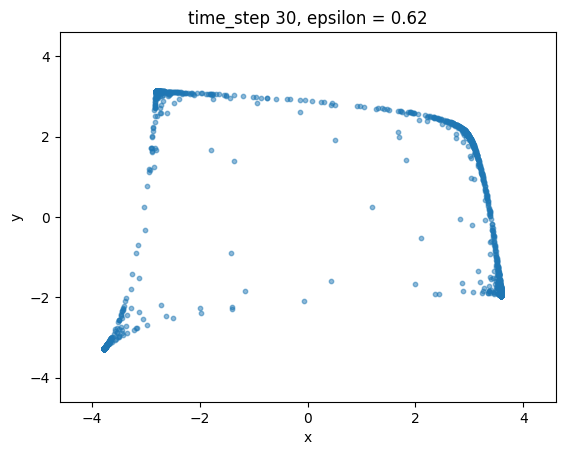

In [91]:
epsilon = 0.62
num_centers = 1000
num_time_steps = 30

run_simulation(epsilon, num_centers, num_time_steps)

Training...
Done.
Plotting ...


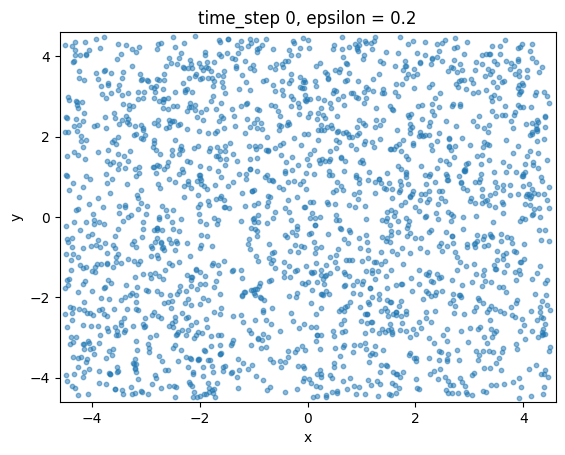

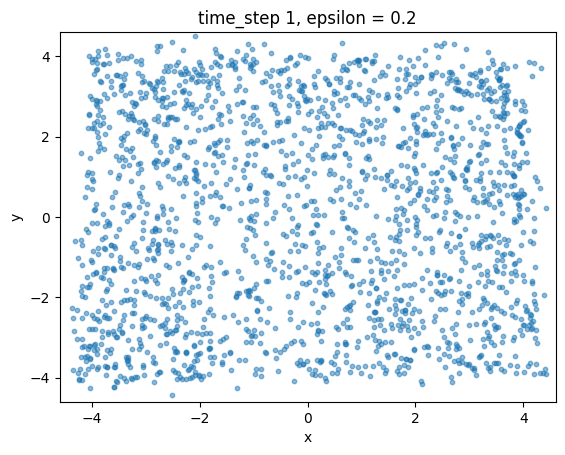

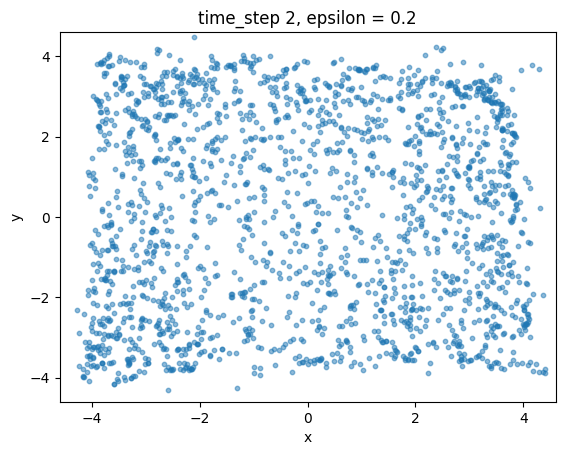

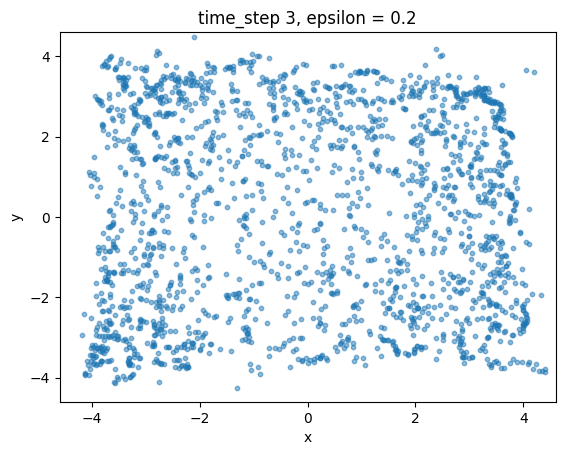

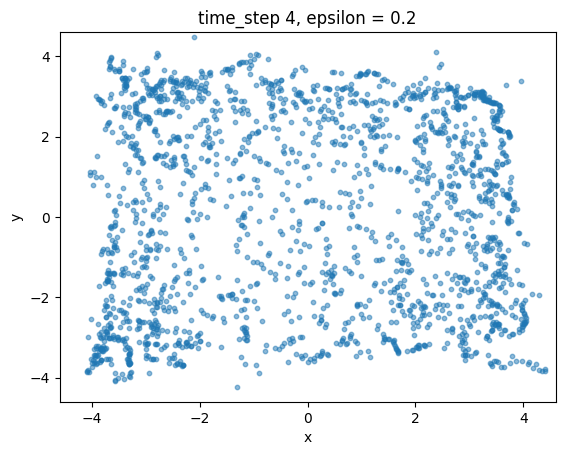

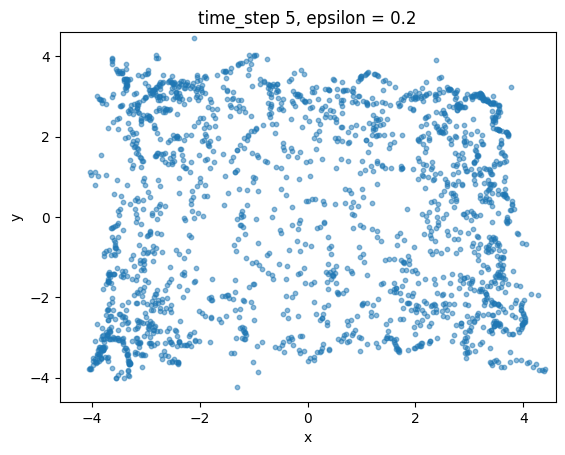

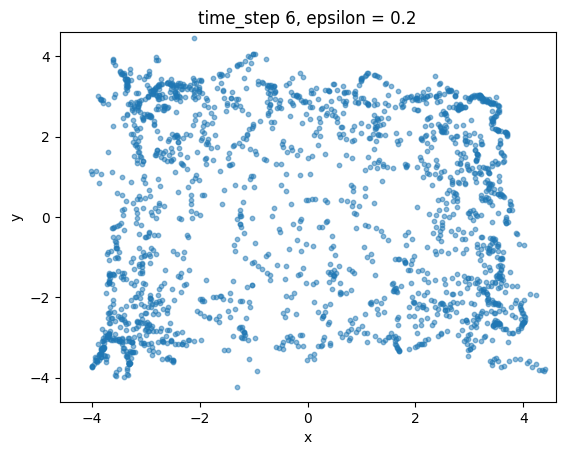

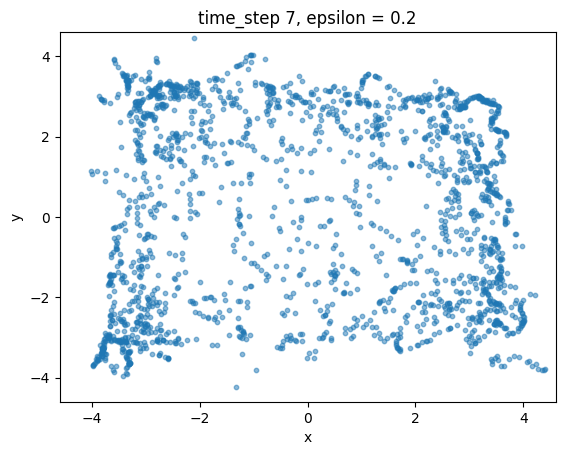

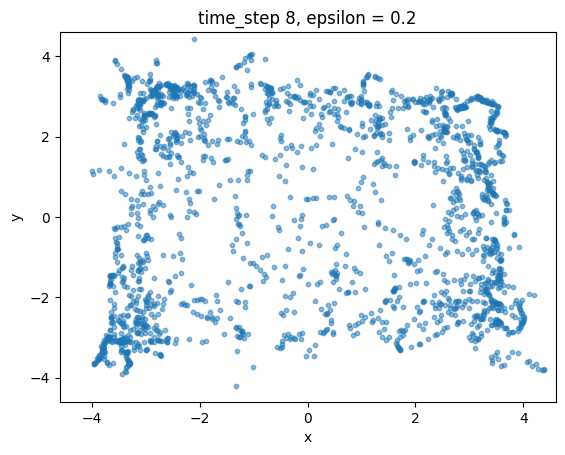

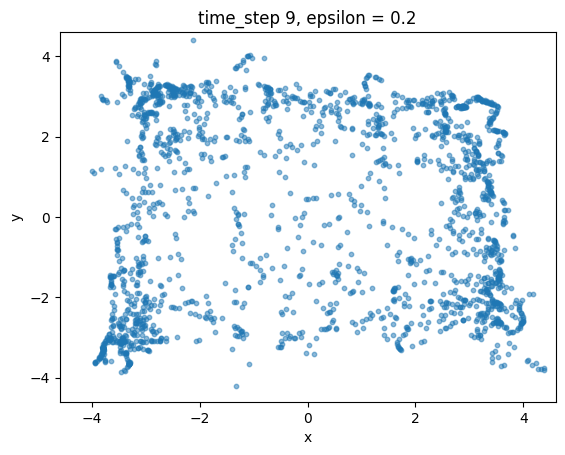

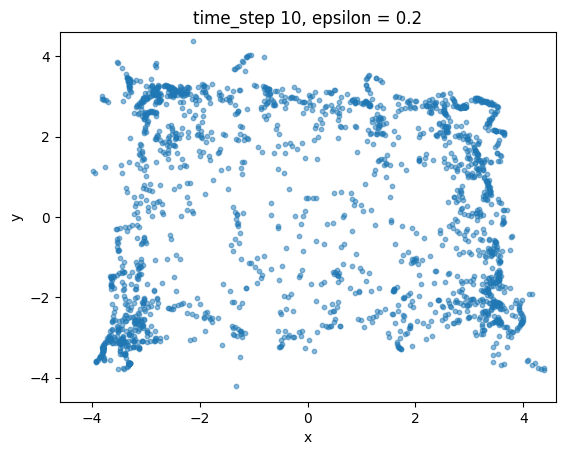

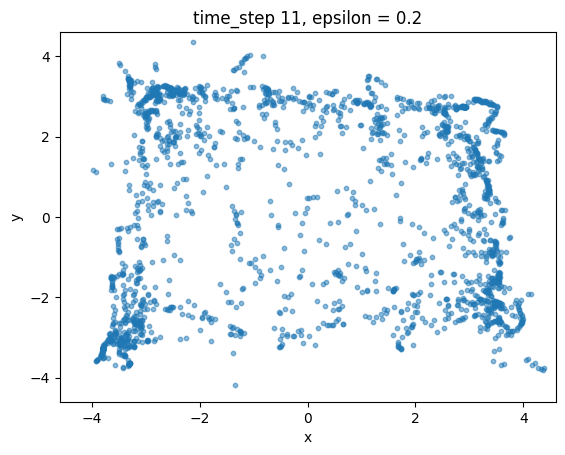

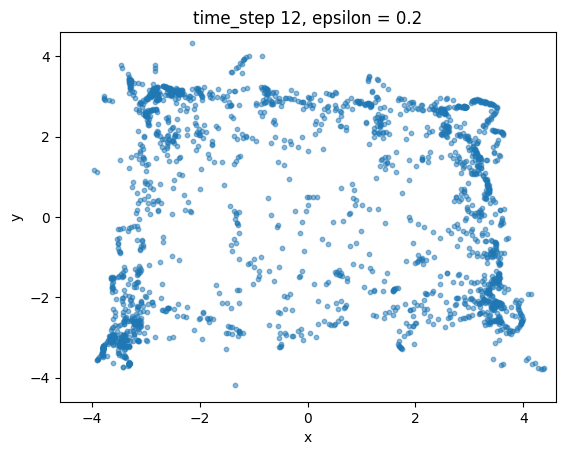

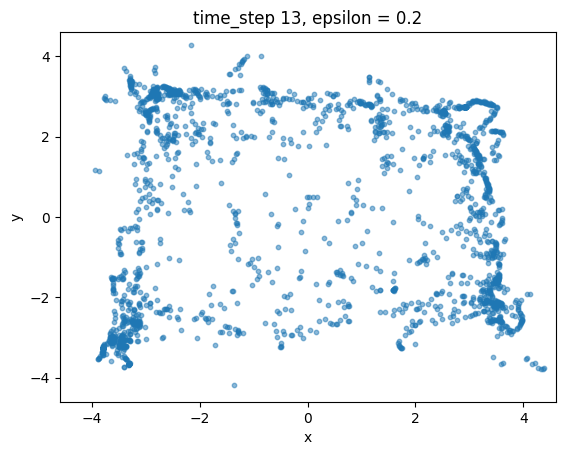

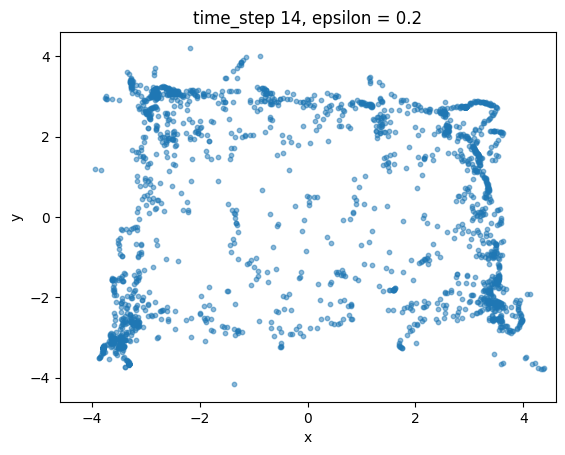

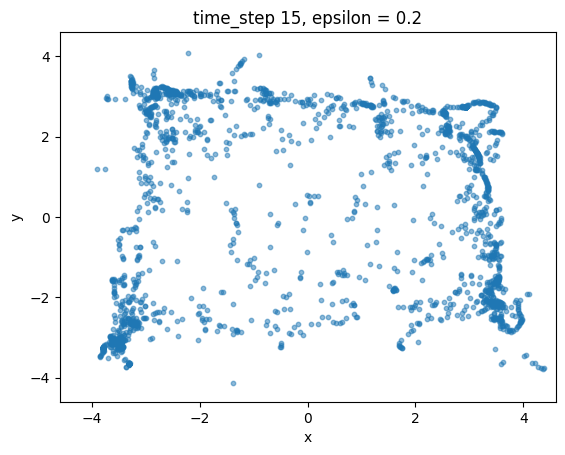

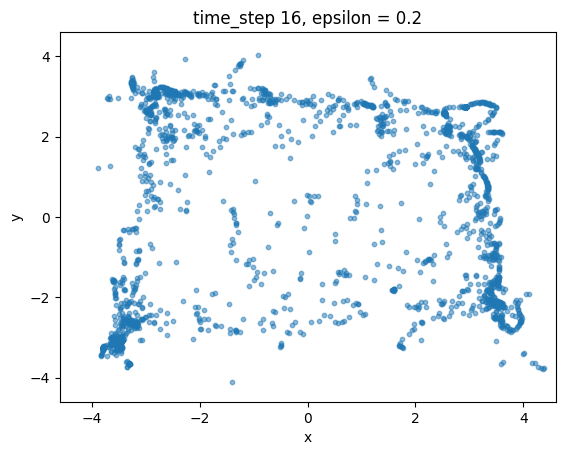

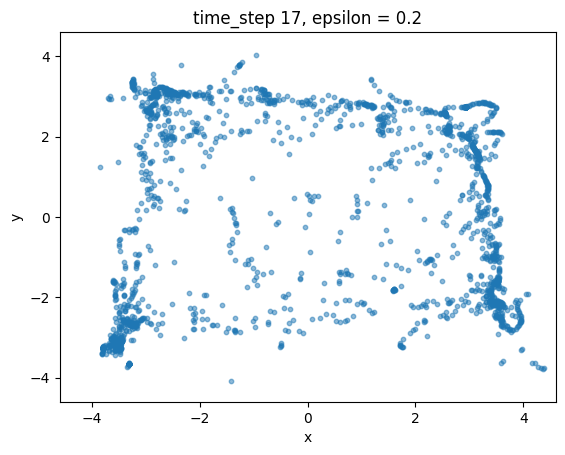

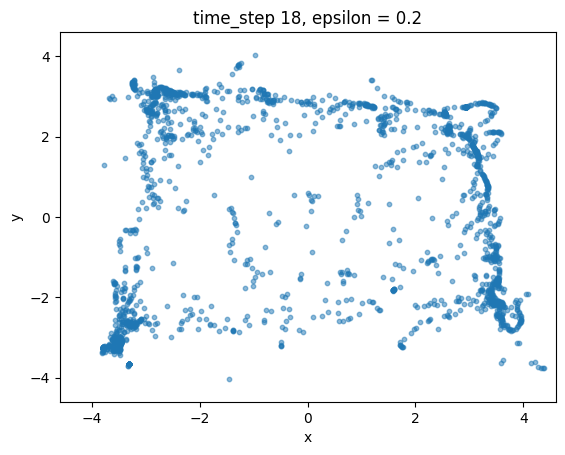

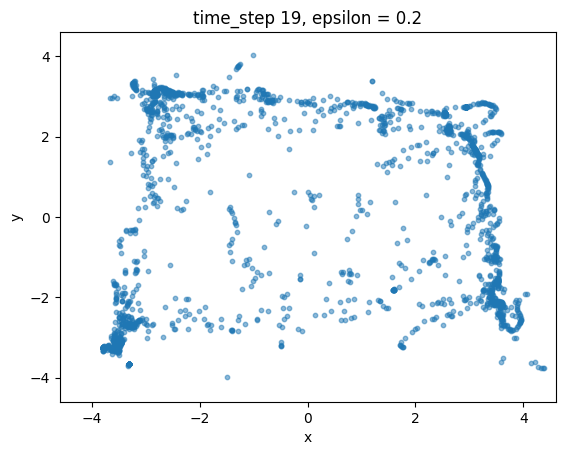

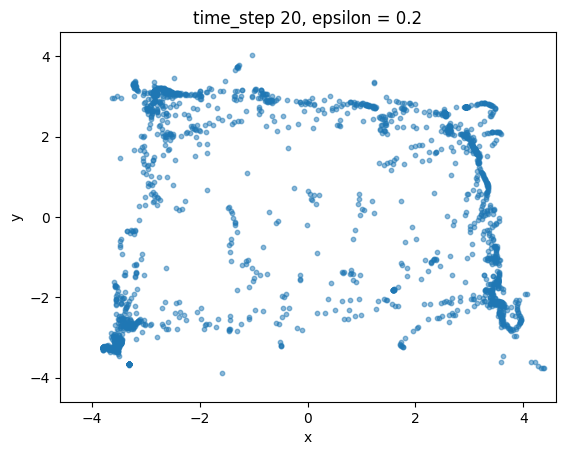

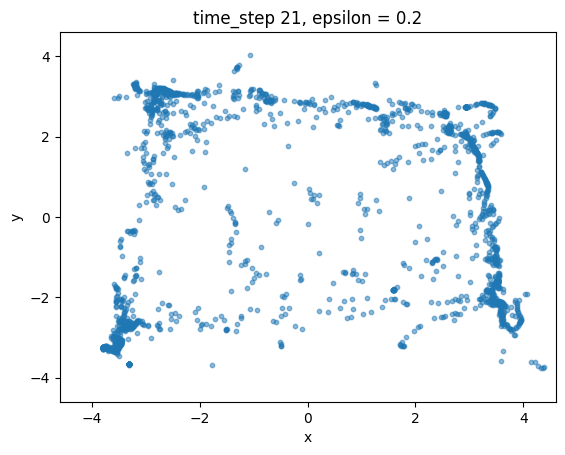

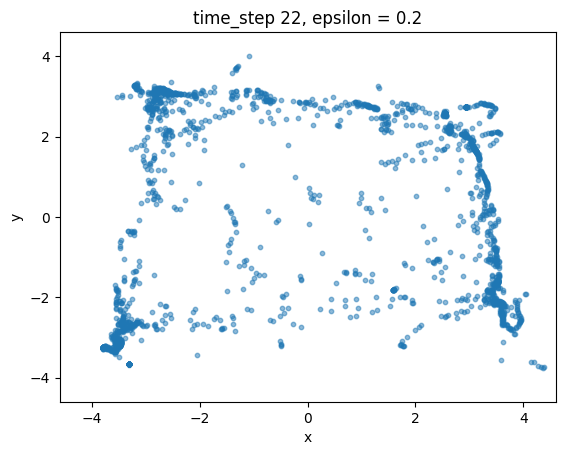

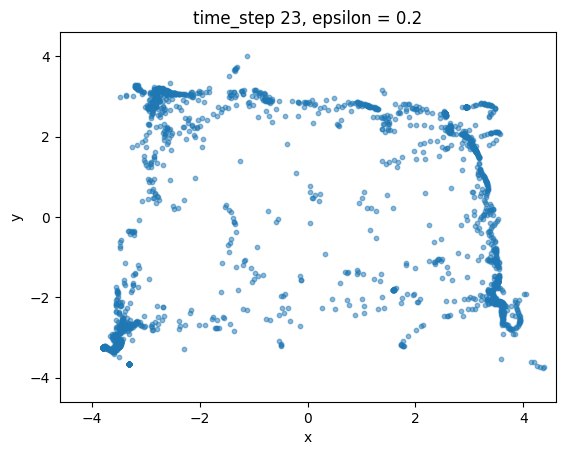

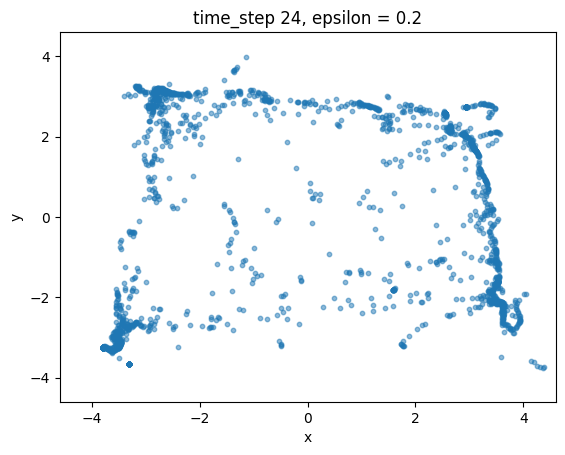

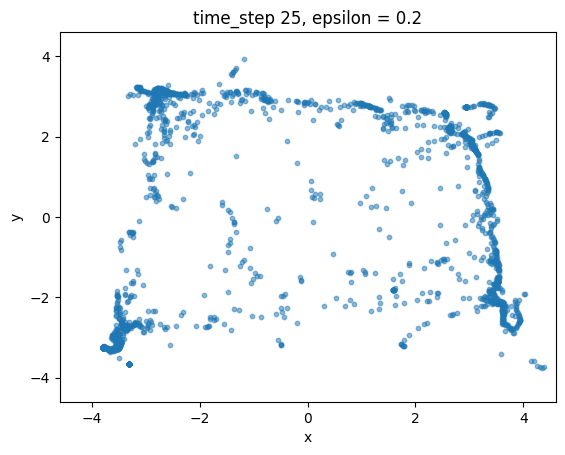

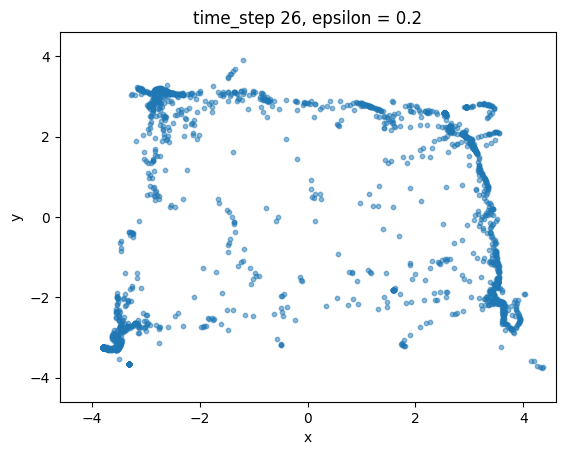

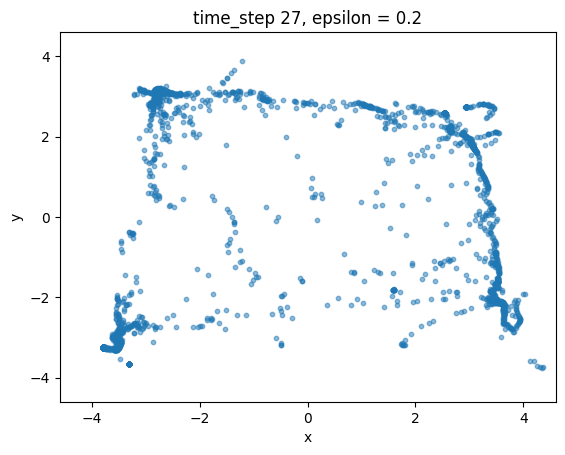

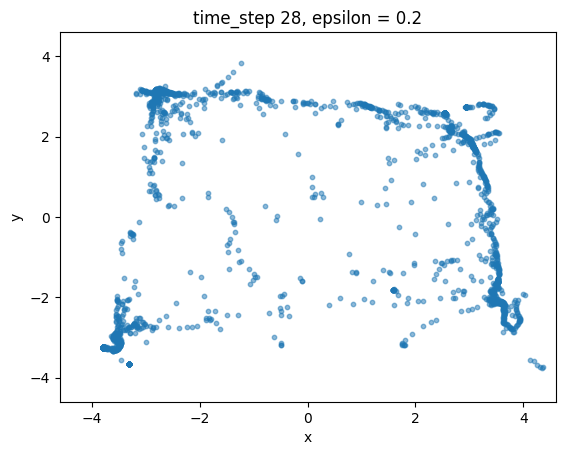

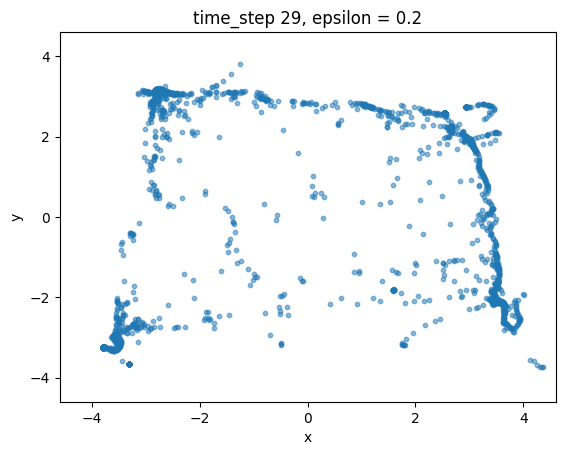

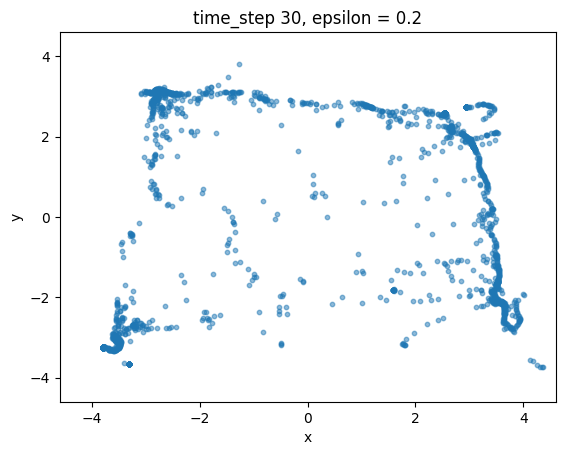

In [92]:
epsilon = 0.2
num_centers = 1000
num_time_steps = 30

run_simulation(epsilon, num_centers, num_time_steps)

Training...
Done.
Plotting ...


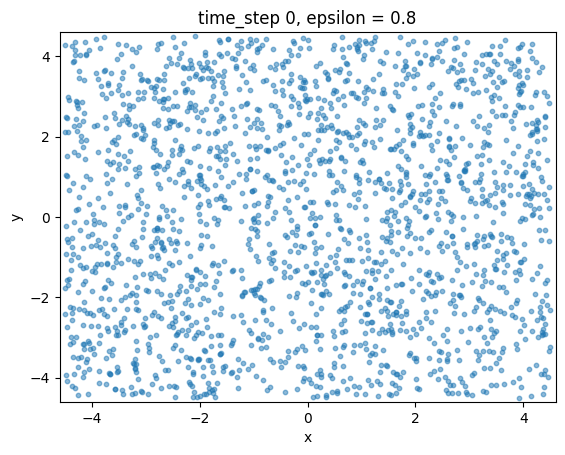

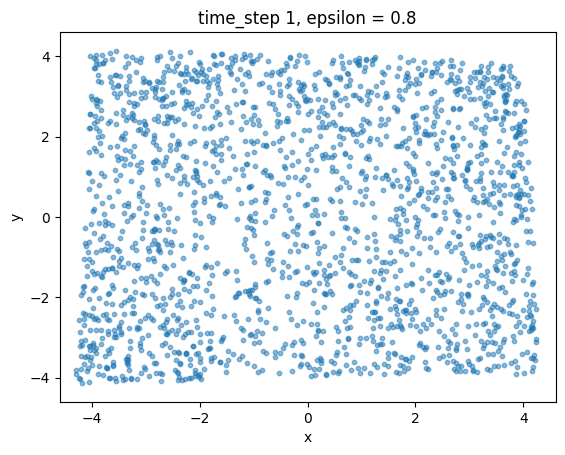

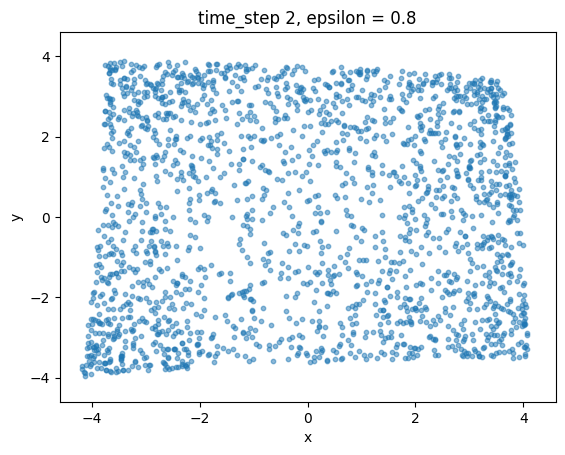

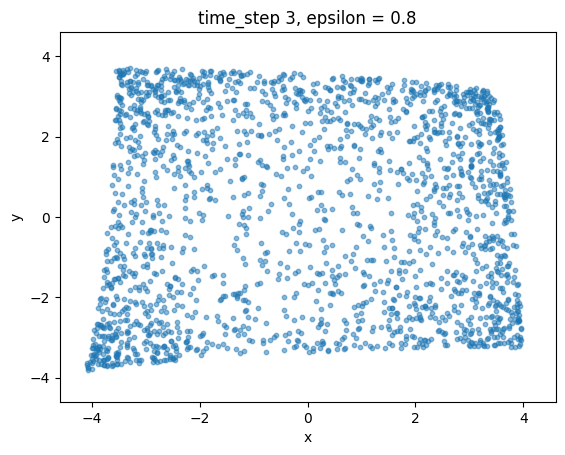

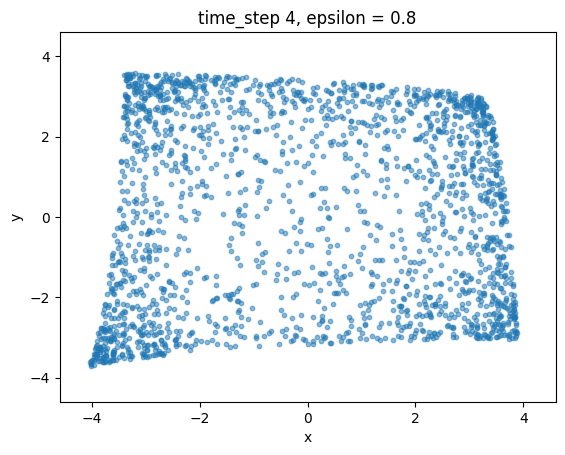

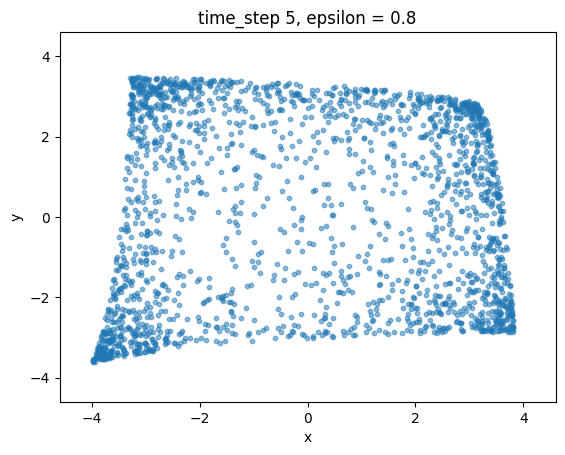

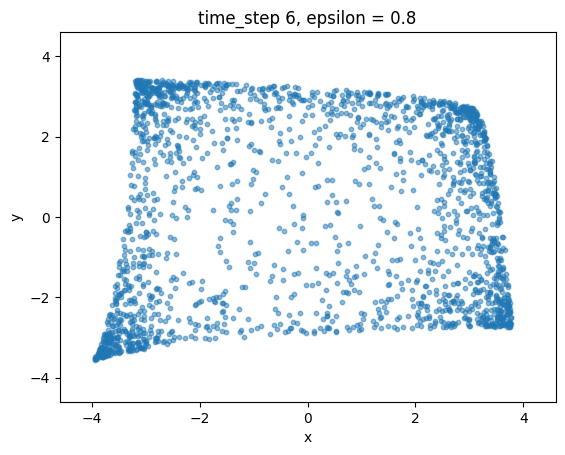

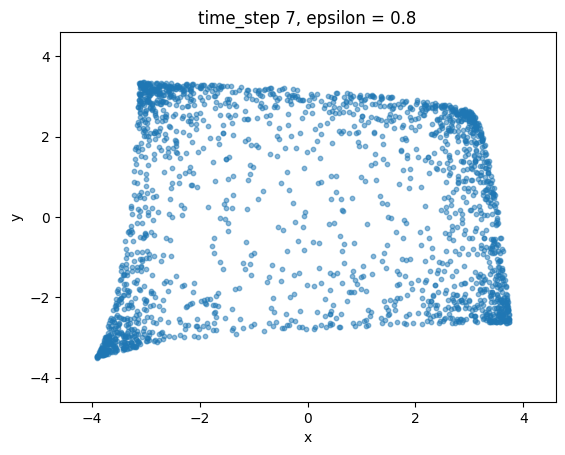

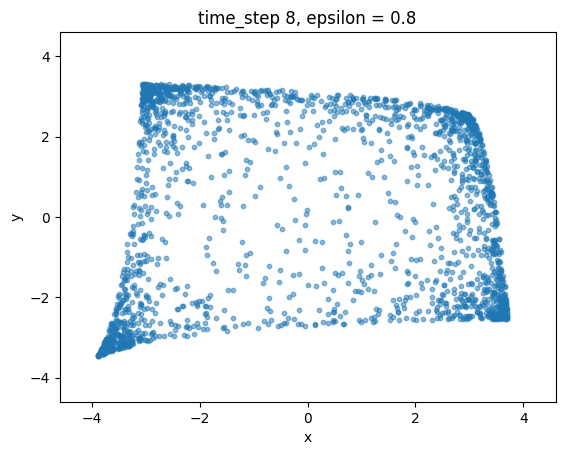

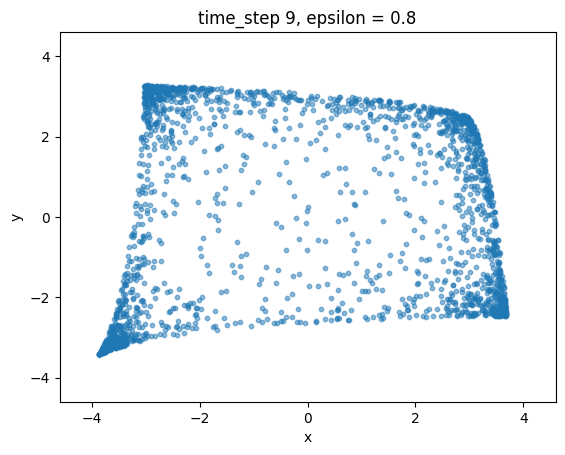

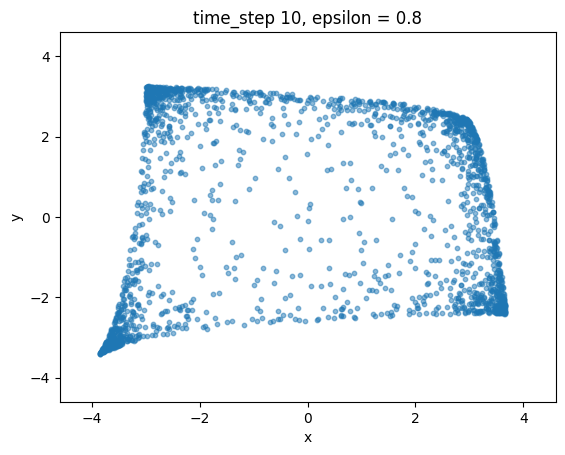

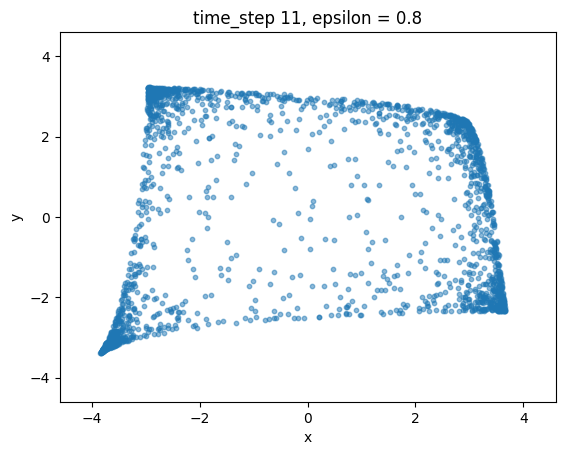

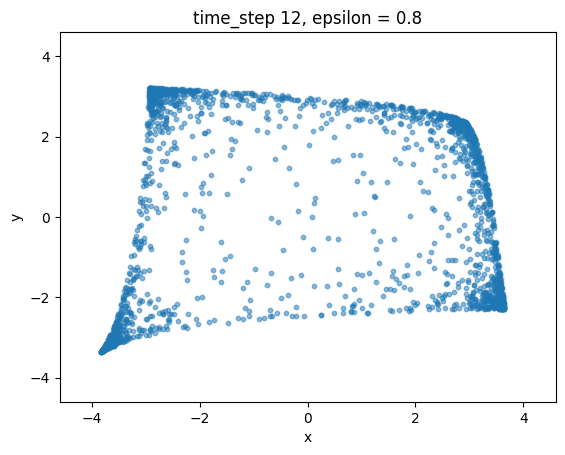

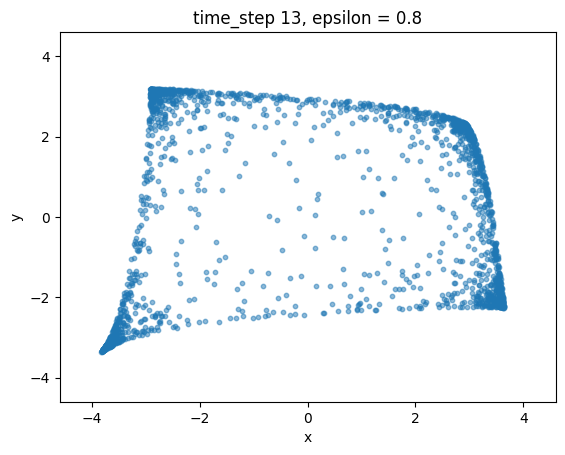

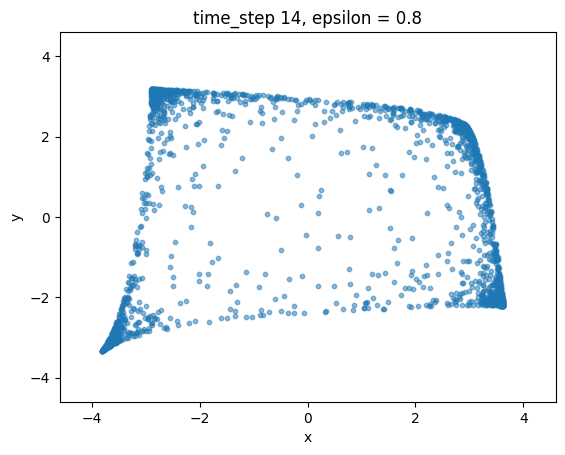

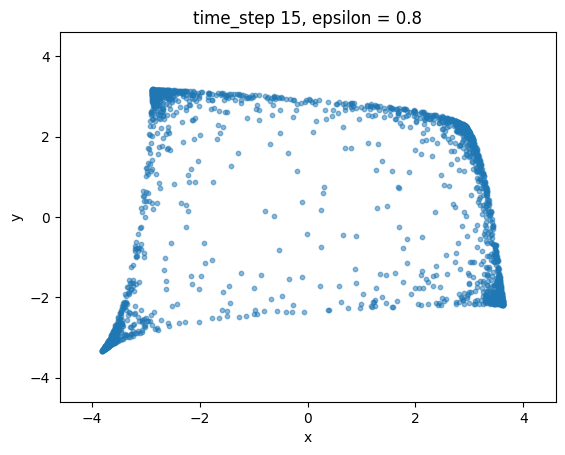

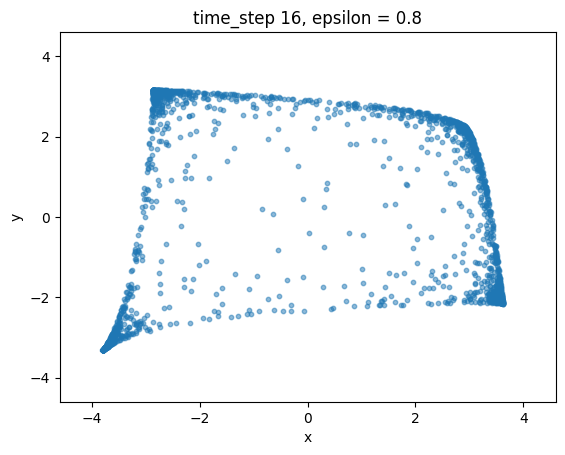

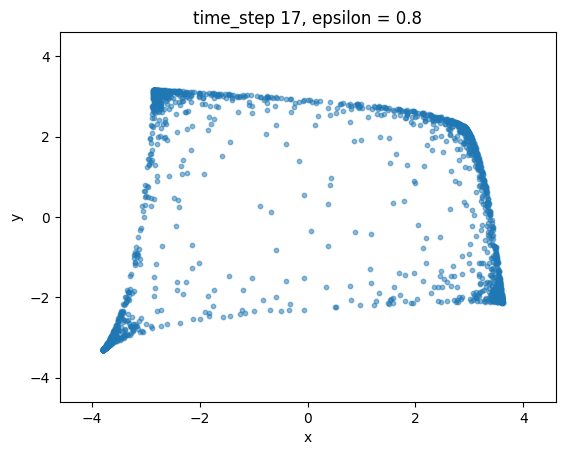

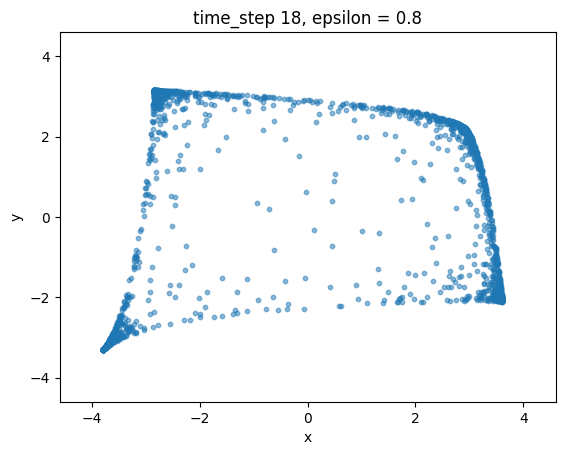

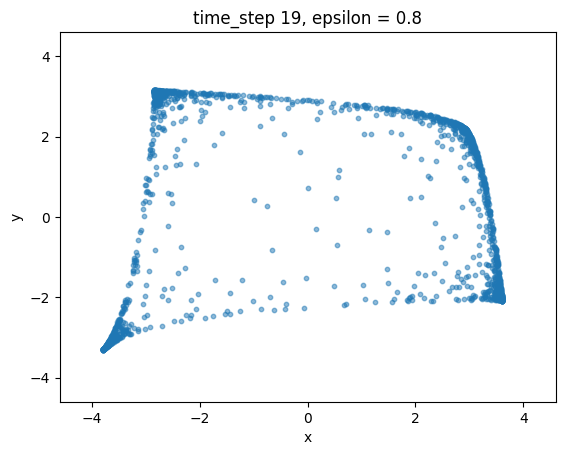

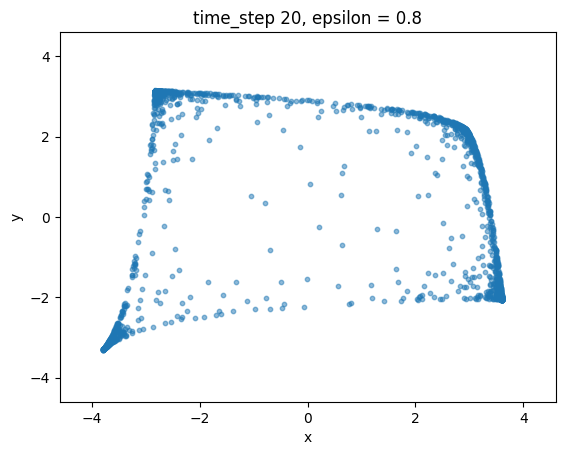

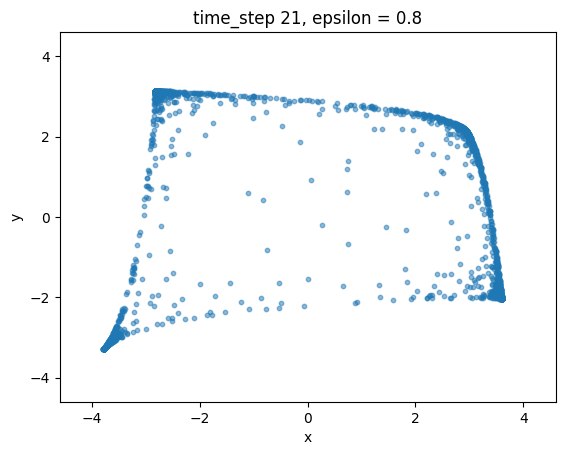

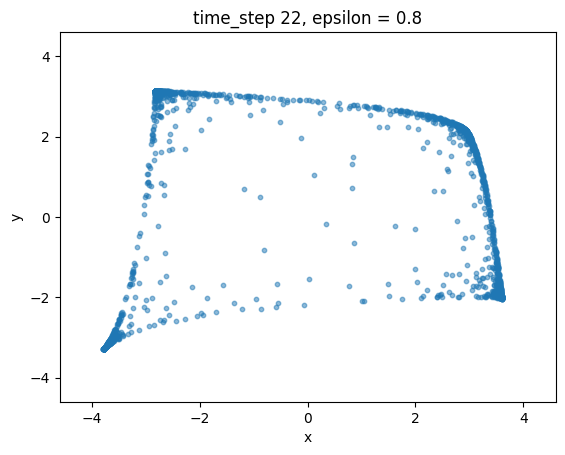

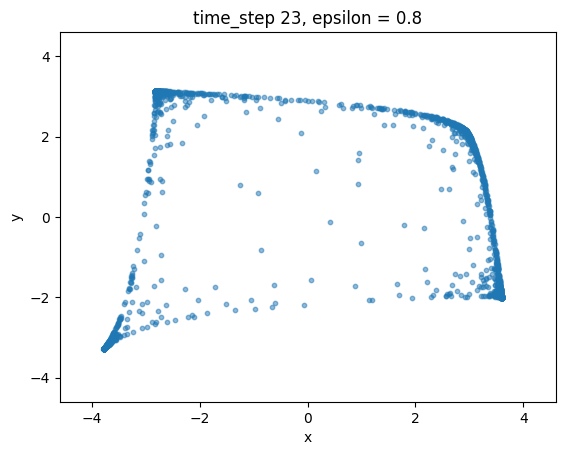

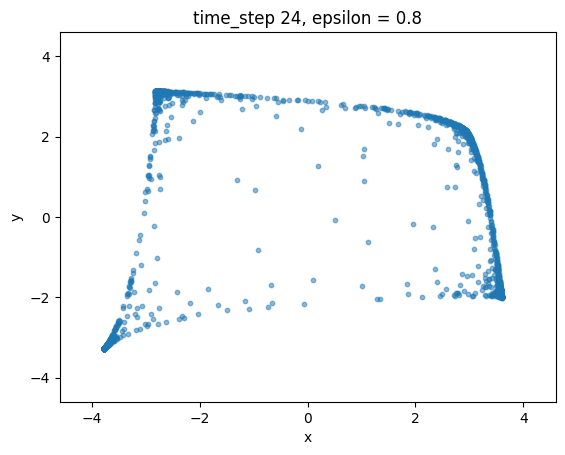

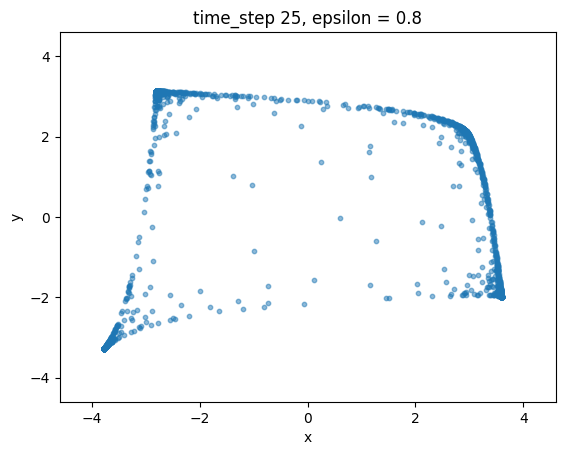

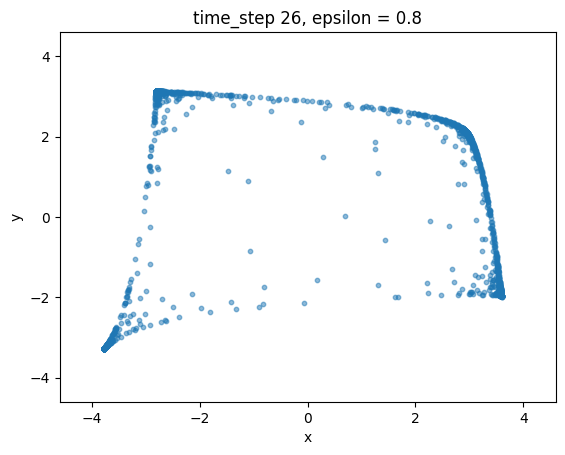

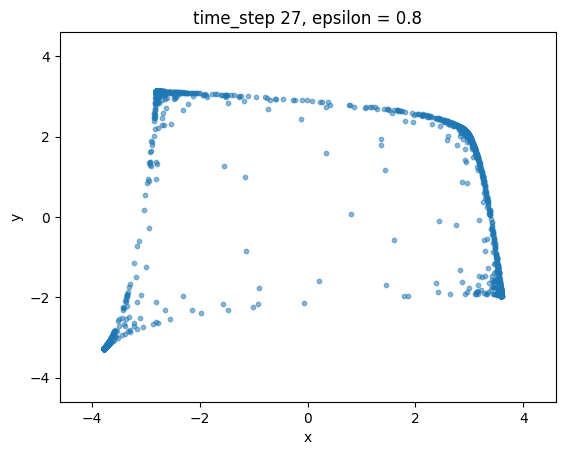

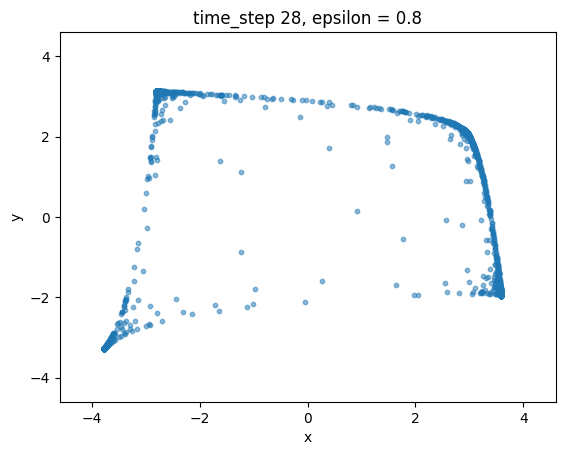

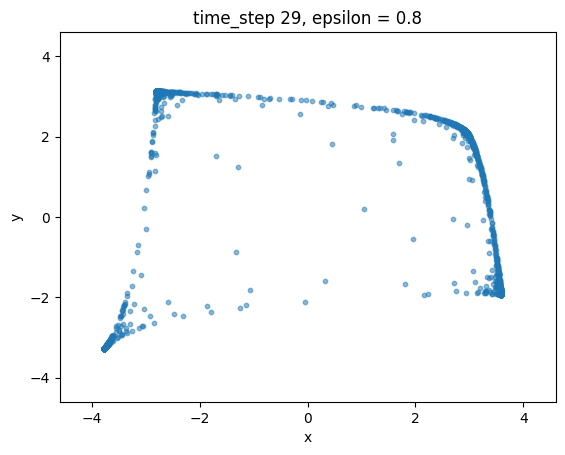

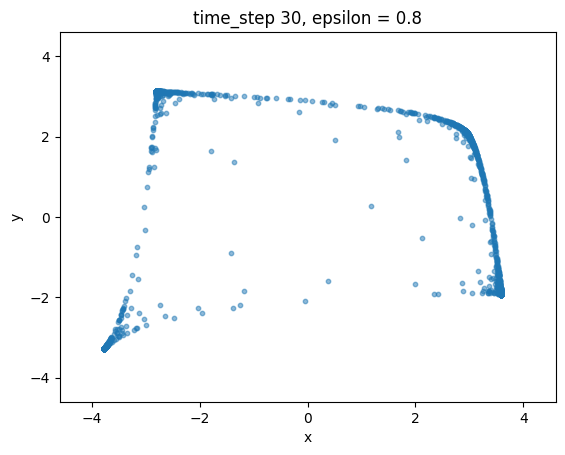

In [93]:
epsilon = 0.8
num_centers = 1000
num_time_steps = 30

run_simulation(epsilon, num_centers, num_time_steps)